## Importing the Libraries

In [1]:
import sys
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from pandas                 import DataFrame
from pandas                 import read_csv
from numpy                  import array
from numpy                  import random
from sklearn.linear_model   import LogisticRegression
from sklearn.tree           import DecisionTreeClassifier
from sklearn.ensemble       import RandomForestClassifier
from sklearn.ensemble       import GradientBoostingClassifier
from sklearn.svm            import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors      import KNeighborsClassifier
from sklearn.metrics        import accuracy_score
from sklearn.metrics        import auc
from sklearn.metrics        import roc_auc_score
from matplotlib             import pyplot
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score
import kds
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from datetime import datetime, timedelta
from sklearn.feature_selection import SelectKBest, f_classif

## Import Data

In [2]:
directory = r"C:\Users\jchreim\Desktop\Desc. & Pred. Analysis\Group Project"
inputData = directory + "/Data"

## Random Seed

In [3]:
random.seed(25)

## Reading in Data

In [4]:
campaigns=read_csv(inputData + "/campaigns.csv", sep=';')
donors=read_csv(inputData + "/donors.csv", sep=',')
gifts=read_csv(inputData + "/gifts.csv", sep=',')
trainData=read_csv(inputData + "/selection campaign 6169.csv", sep=';')
testData=read_csv(inputData + "/selection campaign 7244.csv", sep=';')

In [113]:
scoreData=read_csv(inputData + "/selection campaign 7662.csv", sep=';')

In [5]:
campaigns.head()

,campaignID,date,lettersSent,CostUnit
0,153,13/12/2004,6 873,"0,17 €"
1,154,01/01/2005,7 656,"0,30 €"
2,180,18/01/2005,9 933,"0,20 €"
3,433,29/01/2005,7 448,"0,59 €"
4,476,12/02/2005,6 605,"0,51 €"


In [6]:
donors.head()

,donorID,zipcode,province,region,gender,language,dateOfBirth
0,D100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967
1,D100002,2260.0,Antwerp,Flanders,M,NL,01/14/1952
2,D100003,1780.0,Flemish Brabant,Flanders,M,NL,12/23/1986
3,D100004,1020.0,Brussels,Brussels,F,FR,03/29/1952
4,D100005,1020.0,Brussels,Brussels,F,FR,06/25/1986


In [7]:
gifts.head()

,donorID,campaignID,amount,date
0,D100001,NaN,"12,39",23/03/2004
1,D100001,1577.0,"12,39",11/10/2007
2,D100001,1634.0,"6,69",28/12/2007
3,D100001,1778.0,"24,79",14/06/2008
4,D100001,1808.0,"7,44",09/07/2008


## Create basetable

In [8]:
gifts['amount']=gifts['amount'].str.split(',').str[0].astype('int')

In [9]:
basetable= donors.merge(gifts, how='left', on='donorID')

In [10]:
basetable=basetable.merge(campaigns, how='left', on='campaignID')

In [11]:
basetable.rename(columns={"date_x":"donation_date", "date_y":"campaign_date"}, inplace=True)
basetable.head()

,donorID,zipcode,province,region,gender,language,dateOfBirth,campaignID,amount,donation_date,campaign_date,lettersSent,CostUnit
0,D100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967,NaN,12.0,23/03/2004,NaN,NaN,NaN
1,D100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967,1577.0,12.0,11/10/2007,09/10/2007,34 636,"0,31 €"
2,D100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967,1634.0,6.0,28/12/2007,08/12/2007,34 080,"0,21 €"
3,D100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967,1778.0,24.0,14/06/2008,25/05/2008,30 558,"0,41 €"
4,D100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967,1808.0,7.0,09/07/2008,22/06/2008,39 664,"0,61 €"


In [12]:
basetable["donation_date"] = pd.to_datetime(basetable["donation_date"], errors="coerce")
basetable["campaign_date"] = pd.to_datetime(basetable["campaign_date"], errors="coerce")

C:\Users\jchreim\AppData\Local\Temp\ipykernel_17512\1543407807.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  basetable["donation_date"] = pd.to_datetime(basetable["donation_date"], errors="coerce")


## Extracting Target Variables for Train & Test

In [13]:
y_train=basetable[basetable['campaignID']== 6169]
y_train=y_train[y_train['amount']>=30]
y_test=basetable[basetable['campaignID']== 7244]
y_test=y_test[y_test['amount']>=30]

In [14]:
y_train['Donated']=1
y_test['Donated']=1

In [15]:
y_train=trainData.merge(y_train, how='left',on='donorID')
y_test=testData.merge(y_test, how='left',on='donorID')

In [16]:
y_train['Donated'].fillna(0, inplace=True)
y_test['Donated'].fillna(0, inplace=True)

C:\Users\jchreim\AppData\Local\Temp\ipykernel_17512\2815514174.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  y_train['Donated'].fillna(0, inplace=True)
C:\Users\jchreim\AppData\Local\Temp\ipykernel_17512\2815514174.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [17]:
y_train=y_train[['donorID','Donated']]
y_test=y_test[['donorID','Donated']]

In [18]:
y_train['Donated'].value_counts()

Donated
0.0    33938
1.0      950
Name: count, dtype: int64

In [19]:
y_test['Donated'].value_counts()

Donated
0.0    25428
1.0      217
Name: count, dtype: int64

# Extract Independent Variables for Train & Test

#### Preparing the train dataset

Filtering all the donations made before the 7 August 2018 as we suppose it is today and we don't know the future

In [20]:
trainDateLimit=datetime(2018, 8, 7)
TrainBase=basetable[basetable['donation_date']<=trainDateLimit]
TrainBase=TrainBase.sort_values(by='donation_date', ascending=False)
TrainBase.head()

,donorID,zipcode,province,region,gender,language,dateOfBirth,campaignID,amount,donation_date,campaign_date,lettersSent,CostUnit
201189,D136761,4400.0,Liege,Wallonia,F,FR,09/27/1970,5449.0,10.0,2018-08-07,2018-05-08,30 991,"0,10 €"
182020,D130670,8200.0,West Flanders,Flanders,M,NL,06/01/1982,5449.0,50.0,2018-08-07,2018-05-08,30 991,"0,10 €"
48444,D105393,8200.0,West Flanders,Flanders,M,NL,11/02/1933,5434.0,40.0,2018-08-07,NaT,26 255,"0,20 €"
99410,D112730,1180.0,Brussels,Brussels,M,NL,11/01/1966,NaN,4.0,2018-08-07,NaT,NaN,NaN
46225,D105147,1930.0,Flemish Brabant,Flanders,F,NL,08/03/1943,5449.0,40.0,2018-08-07,2018-05-08,30 991,"0,10 €"


Creating train Set (Merging with donors info)

In [21]:
trainSet=trainData.merge(donors, how='left', on='donorID')
trainSet.head()

,donorID,zipcode,province,region,gender,language,dateOfBirth
0,D100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967
1,D100002,2260.0,Antwerp,Flanders,M,NL,01/14/1952
2,D100004,1020.0,Brussels,Brussels,F,FR,03/29/1952
3,D100008,1780.0,Flemish Brabant,Flanders,M,FR,08/30/1937
4,D100009,1020.0,Brussels,Brussels,M,FR,01/20/1932


#### Preparing the Score Set

Creating Score Set

In [139]:
scoreDateUpperLimit=datetime(2020, 1, 4)
# We can go back only 6637 days back since this is the max we did for the train
scoreDateLowerLimit=scoreDateUpperLimit-timedelta(6637)

In [140]:
ScoreBase=basetable[(basetable['donation_date']<=scoreDateUpperLimit) & (basetable['donation_date']>scoreDateLowerLimit)]

In [141]:
ScoreBase=ScoreBase.merge(donors, how='left', on='donorID')
ScoreBase.head()

,donorID,zipcode_x,province_x,region_x,gender_x,language_x,dateOfBirth_x,campaignID,amount,donation_date,campaign_date,lettersSent,CostUnit,zipcode_y,province_y,region_y,gender_y,language_y,dateOfBirth_y
0,D100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967,NaN,12.0,2004-03-23,NaT,NaN,NaN,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967
1,D100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967,1577.0,12.0,2007-10-11,2007-09-10,34 636,"0,31 €",1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967
2,D100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967,1634.0,6.0,2007-12-28,2007-08-12,34 080,"0,21 €",1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967
3,D100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967,1778.0,24.0,2008-06-14,NaT,30 558,"0,41 €",1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967
4,D100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967,1808.0,7.0,2008-07-09,NaT,39 664,"0,61 €",1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967


In [142]:
scoreSet=scoreData.merge(donors, how='left', on='donorID')
scoreSet.head()

,donorID,zipcode,province,region,gender,language,dateOfBirth
0,D134242,3580.0,Limburg,Flanders,M,NL,09/28/1966
1,D126503,4250.0,Liege,Wallonia,M,FR,10/20/1949
2,D104392,4820.0,Liege,Wallonia,F,FR,05/03/1974
3,D105905,8370.0,West Flanders,Flanders,M,NL,09/18/1970
4,D120506,8020.0,West Flanders,Flanders,M,NL,09/19/1973


#### Preparing the Test dataset

Filtering all the donations made before 21 May 2019 as we suppose it is today and we don't know the future

In [22]:
testDateUpperLimit=datetime(2019, 5, 21)
# We can go back only 6637 days back since this is the max we did for the train
testDateLowerLimit=testDateUpperLimit-timedelta(6637)

In [23]:
TestBase=basetable[(basetable['donation_date']<=testDateUpperLimit) & (basetable['donation_date']>testDateLowerLimit)]

In [24]:
TestBase=TestBase.sort_values(by='donation_date', ascending=False)
TestBase.head()

,donorID,zipcode,province,region,gender,language,dateOfBirth,campaignID,amount,donation_date,campaign_date,lettersSent,CostUnit
1132,D100251,1420.0,Walloon Brabant,Wallonia,F,FR,06/17/1975,7229.0,40.0,2019-05-21,NaT,38 914,"0,06 €"
199546,D136173,8490.0,West Flanders,Flanders,F,NL,02/08/1971,7229.0,50.0,2019-05-21,NaT,38 914,"0,06 €"
101091,D112964,8000.0,West Flanders,Flanders,M,NL,11/18/1958,7229.0,75.0,2019-05-21,NaT,38 914,"0,06 €"
93342,D111658,8490.0,West Flanders,Flanders,M,NL,11/23/1960,7229.0,41.0,2019-05-21,NaT,38 914,"0,06 €"
149845,D122493,8200.0,West Flanders,Flanders,M,NL,11/18/1973,7229.0,41.0,2019-05-21,NaT,38 914,"0,06 €"


Create test Set

Merge the donors of the test with their demographics

In [25]:
testSet=testData.merge(donors, how='left', on='donorID')
testSet.head()

,donorID,zipcode,province,region,gender,language,dateOfBirth
0,D100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967
1,D100002,2260.0,Antwerp,Flanders,M,NL,01/14/1952
2,D100008,1780.0,Flemish Brabant,Flanders,M,FR,08/30/1937
3,D100009,1020.0,Brussels,Brussels,M,FR,01/20/1932
4,D100010,1020.0,Brussels,Brussels,M,FR,05/30/1983


#### Amounts last n years

Generate donation amounts for several time frames

In [26]:
def donationAmount_LastNyears (featureName, aggregation, df, limit_date, basetable):
    x_train_copy=df.copy()
    # Last 18 years
    for i in range (18):
      result=basetable[basetable['donation_date'] >= (limit_date - timedelta(days=365*(i+1)))].groupby('donorID')[featureName].agg(aggregation).reset_index()
      result.columns= ['donorID', f'{aggregation}_{featureName}_Last{i+1}Y']
      x_train_copy=x_train_copy.merge(result, how='left', on='donorID')
    # Last 6M 3M & 1M
    specific_iterations = [6, 3, 1]
    for i in specific_iterations:
      result=basetable[basetable['donation_date'] >= (limit_date - timedelta(days=30*(i)))].groupby('donorID')['amount'].agg(aggregation).reset_index()
      result.columns= ['donorID', f'{aggregation}_{featureName}_Last{i}M']
      x_train_copy=x_train_copy.merge(result, how='left', on='donorID')
    # Last 7 days
    result=basetable[basetable['donation_date'] >= (limit_date - timedelta(days=7))].groupby('donorID')['amount'].agg(aggregation).reset_index()
    result.columns= ['donorID', f'{aggregation}_amount_Last7D']
    x_train_copy=x_train_copy.merge(result, how='left', on='donorID')
    return x_train_copy

#### Yearly donation amounts

Year by Year

In [27]:
def donationAmount_YearN (featureName, aggregation, df, limite_date, basetable):
    x_train_copy=df.copy()
    for i in range (19):
      result=basetable[basetable['donation_date'].dt.year == (limite_date.year -18 +i)].groupby('donorID')[featureName].agg(aggregation).reset_index()
      result.columns= ['donorID', f'{aggregation}_{featureName}_{18 -i}_yearsago']
      x_train_copy=x_train_copy.merge(result, how='left', on='donorID')
    return x_train_copy

Every 2 years

In [28]:
def donationAmount_YearN_M (featureName, aggregation, df, limite_date, basetable):
    x_train_copy=df.copy()
    for i in range (18):
      result=basetable[(basetable['donation_date'].dt.year == (limite_date.year -18 +i)) | (basetable['donation_date'].dt.year == (limite_date.year -18 +i+1))].groupby('donorID')[featureName].agg(aggregation).reset_index()
      result.columns= ['donorID', f'{aggregation}_{featureName}_{18 -i}_{18 -i-1}_yearsago']
      x_train_copy=x_train_copy.merge(result, how='left', on='donorID')
    return x_train_copy

Every 5 years

In [29]:
def donationAmount_YearNtoM (featureName, aggregation, df, limite_date, basetable):
    x_train_copy=df.copy()
    for i in range (14):
      result=basetable[(basetable['donation_date'].dt.year == (limite_date.year -18 +i)) | (basetable['donation_date'].dt.year == (limite_date.year -18 +i+5))].groupby('donorID')[featureName].agg(aggregation).reset_index()
      result.columns= ['donorID', f'{aggregation}_{featureName}_{18-i}to{18-i-5}_yearsago']
      x_train_copy=x_train_copy.merge(result, how='left', on='donorID')
    return x_train_copy

#### Monthly Donation Amounts

6 months

In [30]:
def donationAmount_6M (featureName, aggregation, df, basetable):
    x_train_copy=df.copy()
    specific_iterations = [1,7]
    for i in specific_iterations:
      result=basetable[basetable['donation_date'].dt.month.isin(range(i,i+6))].groupby('donorID')[featureName].agg(aggregation).reset_index()
      if i==1:
        colname=f'{aggregation}_{featureName}_First6MoftheYear'
      elif i==7:
        colname=f'{aggregation}_{featureName}_Last6MoftheYear'
      result.columns= ['donorID', colname]
      x_train_copy=x_train_copy.merge(result, how='left', on='donorID')
    return x_train_copy

Quarterly

In [31]:
def donationAmount_Q (featureName, aggregation, df, basetable):
    x_train_copy=df.copy()
    specific_iterations = [1,4,7,10]
    for i in specific_iterations:
      result=basetable[basetable['donation_date'].dt.month.isin(range(i,i+3))].groupby('donorID')[featureName].agg(aggregation).reset_index()
      quarter_mapping = {
       1: f'{aggregation}_{featureName}_Q1',
       4: f'{aggregation}_{featureName}_Q2',
       7: f'{aggregation}_{featureName}_Q3',
       10: f'{aggregation}_{featureName}_Q4'}
      colname = quarter_mapping.get(i, f'{aggregation}_{featureName}_Unknown')
      result.columns= ['donorID', colname]
      x_train_copy=x_train_copy.merge(result, how='left', on='donorID')
    return x_train_copy

Monthly

In [32]:
def donationAmount_Month (featureName, aggregation, df, basetable):
    x_train_copy=df.copy()
    for i in range(12):
      result=basetable[basetable['donation_date'].dt.month==i+1].groupby('donorID')[featureName].agg(aggregation).reset_index()
      result.columns= ['donorID', f'{aggregation}_{featureName}_M{i+1}']
      x_train_copy=x_train_copy.merge(result, how='left', on='donorID')
    return x_train_copy

#### Weekday Donations last N

In [33]:
def donationAmount_LastNyears_weekday (featureName, aggregation, df, limit_date, basetable):
    x_train_copy=df.copy()
    # Last 18 years
    for i in range (18):
      result=basetable[(basetable['donation_date'].dt.weekday.isin(range(0,5))) & (basetable['donation_date'] >= (limit_date - timedelta(days=365*(i+1))))].groupby('donorID')[featureName].agg(aggregation).reset_index()
      result.columns= ['donorID', f'weekday_{aggregation}_{featureName}_Last{i+1}Y']
      x_train_copy=x_train_copy.merge(result, how='left', on='donorID')
    # Last 6M 3M & 1M
    specific_iterations = [6, 3, 1]
    for i in specific_iterations:
      result=basetable[(basetable['donation_date'].dt.weekday.isin(range(0,5))) & (basetable['donation_date'] >= (limit_date - timedelta(days=30*(i))))].groupby('donorID')['amount'].agg(aggregation).reset_index()
      result.columns= ['donorID', f'weekday_{aggregation}_{featureName}_Last{i}M']
      x_train_copy=x_train_copy.merge(result, how='left', on='donorID')
    # Last 7 days
    result=basetable[(basetable['donation_date'].dt.weekday.isin(range(0,5))) & (basetable['donation_date'] >= (limit_date - timedelta(days=7)))].groupby('donorID')['amount'].agg(aggregation).reset_index()
    result.columns= ['donorID', f'weekday_{aggregation}_amount_Last7D']
    x_train_copy=x_train_copy.merge(result, how='left', on='donorID')
    return x_train_copy

#### Weekend Donations last N

In [34]:
def donationAmount_LastNyears_weekend (featureName, aggregation, df, limit_date, basetable):
    x_train_copy=df.copy()
    # Last 18 years
    for i in range (18):
      result=basetable[(basetable['donation_date'].dt.weekday.isin(range(5,7))) & (basetable['donation_date'] >= (limit_date - timedelta(days=365*(i+1))))].groupby('donorID')[featureName].agg(aggregation).reset_index()
      result.columns= ['donorID', f'weekend_{aggregation}_{featureName}_Last{i+1}Y']
      x_train_copy=x_train_copy.merge(result, how='left', on='donorID')
    # Last 6M 3M & 1M
    specific_iterations = [6, 3, 1]
    for i in specific_iterations:
      result=basetable[(basetable['donation_date'].dt.weekday.isin(range(5,7))) & (basetable['donation_date'] >= (limit_date - timedelta(days=30*(i))))].groupby('donorID')['amount'].agg(aggregation).reset_index()
      result.columns= ['donorID', f'weekend_{aggregation}_{featureName}_Last{i}M']
      x_train_copy=x_train_copy.merge(result, how='left', on='donorID')
    # Last 7 days
    result=basetable[(basetable['donation_date'].dt.weekday.isin(range(5,7))) & (basetable['donation_date'] >= (limit_date - timedelta(days=7)))].groupby('donorID')['amount'].agg(aggregation).reset_index()
    result.columns= ['donorID', f'weekend_{aggregation}_amount_Last7D']
    x_train_copy=x_train_copy.merge(result, how='left', on='donorID')
    return x_train_copy

#### Donation freq last n years

Filtering the donors who donated only for train and test basetables

In [35]:
DonatedTrainBase=TrainBase[TrainBase['amount']>=30]
DonatedTestBase=TestBase[TestBase['amount']>=30]

In [122]:
DonatedScoreBase=ScoreBase[ScoreBase['amount']>=30]

Frequency last 18...1 year

In [36]:
def DonationFrequency_LastNYears(df, date_limit, basetable):
      data=df.copy()
      for i in range (18):
        result=basetable[basetable['donation_date'] >= (date_limit - timedelta(days=365*(i+1)))].groupby('donorID')['amount'].count().reset_index()
        result.columns= ['donorID', f'donation_frequency_Last{i+1}Y']
        data=data.merge(result, how='left', on='donorID')

      #Last 6, 3, 1 months
      
      specific_iterations = [6, 3, 1]
      for i in specific_iterations:
        result=basetable[basetable['donation_date'] >= (date_limit - timedelta(days=30*(i)))].groupby('donorID')['amount'].count().reset_index()
        result.columns= ['donorID', f'donation_frequency_Last{i}M']
        data=data.merge(result, how='left', on='donorID')
      return data

#### Yearly Donation Frequency

Year by Year

In [37]:
def DonationFrequency_YearN (df,date_limit, basetable):
   data=df.copy()
   for i in range (19):
      result=basetable[basetable['donation_date'].dt.year == (date_limit.year -18 +i)].groupby('donorID')['amount'].count().reset_index()
      result.columns= ['donorID', f'donation_frequency_{18-i}_Yearsago']
      data=data.merge(result, how='left', on='donorID')
   return data

Every 2 years

In [38]:
def DonationFrequency_YearN_M (df, date_limit, basetable):
      data=df.copy()
      for i in range (18):
         result=basetable[(basetable['donation_date'].dt.year == (date_limit.year -18 +i)) | (basetable['donation_date'].dt.year == (date_limit.year -18 +i+1))].groupby('donorID')['amount'].count().reset_index()
         result.columns= ['donorID', f'donation_frequency_{18-i}_{18-i-1}_YearsAgo']
         data=data.merge(result, how='left', on='donorID')
      return data

Every 5 years

In [39]:
def DonationFrequency_YearNtoM(df, date_limit, basetable):
      data=df.copy()
      for i in range (14):
        result=basetable[(basetable['donation_date'].dt.year == (date_limit.year -18 +i)) | (basetable['donation_date'].dt.year == (date_limit.year -18 +i+5))].groupby('donorID')['amount'].count().reset_index()
        result.columns= ['donorID', f'donation_frequency_{18-i}_{18-i-5}_YearsAgo']
        data=data.merge(result, how='left', on='donorID')
      return data

#### Monthly Donation Frequency

6 Months

In [40]:
def DonationFrequency_6M (df, basetable):
    data=df.copy()
    colname=""
    specific_iterations=[1,7]
    for i in specific_iterations:
      result=basetable[basetable['donation_date'].dt.month.isin(range(i,i+6))].groupby('donorID')['amount'].count().reset_index()
      if i==1:
        colname=f'donation_frequency_First6MoftheYear'
      elif i==7:
        colname=f'donation_frequency_Last6MoftheYear'
      result.columns= ['donorID', colname]
      data=data.merge(result, how='left', on='donorID')
    return data

Quarterly

In [41]:
def DonationFrequency_Q(df, basetable):
      data=df.copy()
      specific_iterations = [1,4,7,10]
      for i in specific_iterations:
        result=basetable[basetable['donation_date'].dt.month.isin(range(i,i+3))].groupby('donorID')['amount'].count().reset_index()
        quarter_mapping = {
          1: f'donation_frequency_Q1',
          4: f'donation_frequency_Q2',
          7: f'donation_frequency_Q3',
          10: f'donation_frequency_Q4'}
        colname = quarter_mapping.get(i, f'donation_frequency_Unknown')
        result.columns= ['donorID', colname]
        data=data.merge(result, how='left', on='donorID')
      return data

Monthly

In [42]:
def DonationFrequency_M(df, basetable):
      data=df.copy()
      for i in range(12):
         result=basetable[basetable['donation_date'].dt.month==i+1].groupby('donorID')['amount'].count().reset_index()
         result.columns= ['donorID', f'donation_frequency_M{i+1}']
         data=data.merge(result, how='left', on='donorID')
      return data

#### Weekday Donation Frequency Last N

In [43]:
def donationFrequency_LastNyears_weekday(df, date_limit, basetable):
    data=df.copy()
    for i in range (18):
        result=basetable[(basetable['donation_date'].dt.weekday.isin(range(0,5))) & (basetable['donation_date'] >= (date_limit - timedelta(days=365*(i+1))))].groupby('donorID')['amount'].count().reset_index()
        result.columns= ['donorID', f'weekday_donation_frequency_Last{i+1}Y']
        data=data.merge(result, how='left', on='donorID')
# Last 6M 3M & 1M
    specific_iterations = [6, 3, 1]
    for i in specific_iterations:
        result=basetable[(basetable['donation_date'].dt.weekday.isin(range(0,5))) & (basetable['donation_date'] >= (date_limit - timedelta(days=30*(i))))].groupby('donorID')['amount'].count().reset_index()
        result.columns= ['donorID', f'weekday_donation_frequency_Last{i}M']
        data=data.merge(result, how='left', on='donorID')
    return data

#### Weekend Donation Frequency Last N

In [44]:
def donationFrequency_LastNyears_weekend(df, date_limit, basetable):
    data=df.copy()
    for i in range (18):
        result=basetable[(basetable['donation_date'].dt.weekday.isin(range(5,7))) & (basetable['donation_date'] >= (date_limit - timedelta(days=365*(i+1))))].groupby('donorID')['amount'].count().reset_index()
        result.columns= ['donorID', f'weekend_donation_frequency_Last{i+1}Y']
        data=data.merge(result, how='left', on='donorID')
# Last 6M 3M & 1M
    specific_iterations = [6, 3, 1]
    for i in specific_iterations:
        result=basetable[(basetable['donation_date'].dt.weekday.isin(range(5,7))) & (basetable['donation_date'] >= (date_limit - timedelta(days=30*(i))))].groupby('donorID')['amount'].count().reset_index()
        result.columns= ['donorID', f'weekend_donation_frequency_Last{i}M']
        data=data.merge(result, how='left', on='donorID')
    return data

#### Donation Date Variables

Average Gap between donations (days)

In [45]:
def Avg_Gap_Donations (df, basetable):
    data=df.copy()
    bt_sorted = basetable.sort_values(by=['donorID', 'donation_date'])
    bt_sorted['date_diff'] = bt_sorted.groupby('donorID')['donation_date'].diff().dt.days   #Take the diff between each donation
    average_gap = bt_sorted.groupby('donorID')['date_diff'].mean().reset_index()            # Group per Donnors and aggregate in mean the date_diff var
    average_gap.columns = ['donorID', 'average_gap_days']
    data = data.merge(average_gap, on='donorID', how='left')
    return data

Recency in Days

In [46]:
def Recency (df, basetable, ref_date):
   data=df.copy()
   recency = basetable.groupby('donorID')['donation_date'].max().reset_index()
   recency['recency_days'] = (ref_date - recency['donation_date']).dt.days
   data=data.merge(recency, on='donorID', how='left')
   return data

Number of days since first donation

In [47]:
def Days_Since_FirstDonation (df, basetable, ref_date):
    data=df.copy()
    first_donation = basetable.groupby('donorID')['donation_date'].min().reset_index()
    first_donation['days_since_first_donation'] = (ref_date - first_donation['donation_date']).dt.days
    first_donation=first_donation[['donorID','days_since_first_donation']]
    data=data.merge(first_donation, on='donorID', how='left')
    return data

Number of days since last donation

In [48]:
def Days_Since_LastDonation (df, basetable, ref_date):
    data=df.copy()
    last_donation = basetable.groupby('donorID')['donation_date'].max().reset_index()
    last_donation['days_since_last_donation'] = (ref_date - last_donation['donation_date']).dt.days
    last_donation=last_donation[['donorID','days_since_last_donation']]
    data=data.merge(last_donation, on='donorID', how='left')
    return data

Last Donation Quarter

In [49]:
def LastDonation_Quarter (df, basetable):
    data=df.copy()
    last_quarter = basetable.groupby('donorID')['donation_date'].max().reset_index()
    last_quarter['last_donation_quarter'] = last_quarter['donation_date'].dt.quarter
    last_quarter=last_quarter[['donorID', 'last_donation_quarter']]
    data=data.merge(last_quarter, on='donorID', how='left')
    return data

Last Donation Month

In [50]:
def LastDonation_Month (df, basetable):
    data=df.copy()
    last_month = basetable.groupby('donorID')['donation_date'].max().reset_index()
    last_month['last_donation_month'] = last_month['donation_date'].dt.month
    last_month=last_month[['donorID', 'last_donation_month']]
    data=data.merge(last_month, on='donorID', how='left')
    return data

Number of the highest donation (1 --> first donation of the donor is the highest)

In [51]:
def Highest_Donation_Num (df, basetable, date_limit):
    data=df.copy()
    # sort first by ID and donation_date
    bt_sorted = basetable.sort_values(by=['donorID', 'donation_date']).copy()
    # Counter in the donation date for each donor
    bt_sorted['donation_order'] = bt_sorted.groupby('donorID').cumcount() + 1
    #Finnd the id of the max donation number for each donor
    highest_donation = bt_sorted.loc[bt_sorted.groupby('donorID')['amount'].idxmax()]
    highest_donation['days_since_highest_donation']=(date_limit-highest_donation['donation_date']).astype('int64')
    highest_donation = highest_donation[['donorID', 'donation_order', 'days_since_highest_donation']]
    highest_donation = highest_donation.rename(columns={
    'donation_order': 'highest_donation_order',
    'days_since_highest_donation': 'days_since_highest_donation'
    })
    data=data.merge(highest_donation, on='donorID', how='left')
    return data

Number of the lowest donation (1 --> first donation of the donor is the lowest)

In [52]:
def Lowest_Donation_Num (df, basetable, date_limit):
    data=df.copy()
    # sort first by ID and donation_date
    bt_sorted = basetable.sort_values(by=['donorID', 'donation_date']).copy()
    # Counter in the donation date for each donor
    bt_sorted['donation_order'] = bt_sorted.groupby('donorID').cumcount() + 1
    #Finnd the id of the max donation number for each donor
    lowest_donation = bt_sorted.loc[bt_sorted.groupby('donorID')['amount'].idxmin()]
    lowest_donation['days_since_lowest_donation']=(date_limit-lowest_donation['donation_date']).astype('int64')
    lowest_donation = lowest_donation[['donorID', 'donation_order', 'days_since_lowest_donation']]
    lowest_donation = lowest_donation.rename(columns={
    'donation_order': 'lowest_donation_order',
    'days_since_lowest_donation': 'days_since_lowest_donation'
    })
    data=data.merge(lowest_donation, on='donorID', how='left')
    return data

#### Campaign Date variables

Average Responsiveness per donor (the average of the difference in days between the donation date and the campaign date)

In [53]:
def Avg_Response (df, basetable):
    data=df.copy()
    valid_donations=basetable[basetable['campaignID'].notnull()]
   # For each donor and campaign, get the first donation date
    first_donations = valid_donations.groupby(['donorID', 'campaignID']).agg(
    first_donation_date=('donation_date', 'min'),
    campaign_start_date=('campaign_date', 'first')
    ).reset_index()

   #  Calculate days to donate for each donor-campaign combination
    first_donations['DaysToDonate'] = (
      first_donations['first_donation_date'] - first_donations['campaign_start_date']
     ).dt.days

    # Count the total number of times each customer has donated
    total_time_donate = valid_donations.groupby('donorID').size().reset_index(name='TotalTimeDonate')

    # Calculate the total donation amount for each customer
    total_donation_amount = valid_donations.groupby('donorID')['amount'].sum().reset_index(name='TotalDonationAmount')

    # Merge total donation count and amount into valid_donations
    valid_donations = valid_donations.merge(total_time_donate, on='donorID', how='left')
    valid_donations = valid_donations.merge(total_donation_amount, on='donorID', how='left')

    # Keep only distinct donorID and the two created columns
    valid_donations = valid_donations[['donorID', 'TotalTimeDonate', 'TotalDonationAmount']].drop_duplicates()
    valid_donations['AverageResponse'] = valid_donations['TotalDonationAmount'] / valid_donations['TotalTimeDonate']
    valid_donations=valid_donations[['donorID','AverageResponse']]
    data=data.merge(valid_donations, on='donorID', how='left')
    return data


#### Generate All Variables

Donation Amount Variables

For Train

In [54]:
#Last N Years
trainSet=donationAmount_LastNyears('amount','sum',trainSet, trainDateLimit, TrainBase)
trainSet=donationAmount_LastNyears('amount','mean',trainSet, trainDateLimit, TrainBase)
trainSet=donationAmount_LastNyears('amount','min',trainSet, trainDateLimit, TrainBase)
trainSet=donationAmount_LastNyears('amount','max',trainSet, trainDateLimit, TrainBase)
trainSet=donationAmount_LastNyears('amount','std',trainSet, trainDateLimit, TrainBase)
#Yearly
trainSet=donationAmount_YearN('amount','sum',trainSet, trainDateLimit, TrainBase)
trainSet=donationAmount_YearN('amount','mean',trainSet, trainDateLimit, TrainBase)
trainSet=donationAmount_YearN('amount','std',trainSet, trainDateLimit, TrainBase)
trainSet=donationAmount_YearN_M('amount','sum',trainSet, trainDateLimit, TrainBase)
trainSet=donationAmount_YearN_M('amount','mean',trainSet, trainDateLimit, TrainBase)
trainSet=donationAmount_YearN_M('amount','std',trainSet, trainDateLimit, TrainBase)
trainSet=donationAmount_YearNtoM('amount','sum',trainSet, trainDateLimit, TrainBase)
trainSet=donationAmount_YearNtoM('amount','mean',trainSet, trainDateLimit, TrainBase)
trainSet=donationAmount_YearNtoM('amount','std',trainSet, trainDateLimit, TrainBase)
#Monthly
trainSet=donationAmount_6M('amount','sum',trainSet, TrainBase)
trainSet=donationAmount_6M('amount','mean',trainSet, TrainBase)
trainSet=donationAmount_6M('amount','std',trainSet, TrainBase)
trainSet=donationAmount_Q('amount','sum',trainSet, TrainBase)
trainSet=donationAmount_Q('amount','mean',trainSet, TrainBase)
trainSet=donationAmount_Q('amount','std',trainSet, TrainBase)
trainSet=donationAmount_Month('amount','sum',trainSet, TrainBase)
trainSet=donationAmount_Month('amount','mean',trainSet, TrainBase)
trainSet=donationAmount_Month('amount','std',trainSet, TrainBase)
#Weekday
trainSet=donationAmount_LastNyears_weekday('amount','sum',trainSet,trainDateLimit, TrainBase)
trainSet=donationAmount_LastNyears_weekday('amount','mean',trainSet,trainDateLimit, TrainBase)
#Weekend
trainSet=donationAmount_LastNyears_weekend('amount','sum',trainSet,trainDateLimit, TrainBase)
trainSet=donationAmount_LastNyears_weekend('amount','mean',trainSet,trainDateLimit, TrainBase)

For Test

In [55]:
#Last N Years
testSet=donationAmount_LastNyears('amount','sum',testSet, testDateUpperLimit, TestBase)
testSet=donationAmount_LastNyears('amount','mean',testSet, testDateUpperLimit, TestBase)
testSet=donationAmount_LastNyears('amount','min',testSet, testDateUpperLimit, TestBase)
testSet=donationAmount_LastNyears('amount','max',testSet, testDateUpperLimit, TestBase)
testSet=donationAmount_LastNyears('amount','std',testSet, testDateUpperLimit, TestBase)
#Yearly
testSet=donationAmount_YearN('amount','sum',testSet, testDateUpperLimit, TestBase)
testSet=donationAmount_YearN('amount','mean',testSet, testDateUpperLimit, TestBase)
testSet=donationAmount_YearN('amount','std',testSet, testDateUpperLimit, TestBase)
testSet=donationAmount_YearN_M('amount','sum',testSet, testDateUpperLimit, TestBase)
testSet=donationAmount_YearN_M('amount','mean',testSet, testDateUpperLimit, TestBase)
testSet=donationAmount_YearN_M('amount','std',testSet, testDateUpperLimit, TestBase)
testSet=donationAmount_YearNtoM('amount','sum',testSet, testDateUpperLimit, TestBase)
testSet=donationAmount_YearNtoM('amount','mean',testSet, testDateUpperLimit, TestBase)
testSet=donationAmount_YearNtoM('amount','std',testSet, testDateUpperLimit, TestBase)
#Monthly
testSet=donationAmount_6M('amount','sum',testSet, TestBase)
testSet=donationAmount_6M('amount','mean',testSet, TestBase)
testSet=donationAmount_6M('amount','std',testSet, TestBase)
testSet=donationAmount_Q('amount','sum',testSet, TestBase)
testSet=donationAmount_Q('amount','mean',testSet, TestBase)
testSet=donationAmount_Q('amount','std',testSet, TestBase)
testSet=donationAmount_Month('amount','sum',testSet, TestBase)
testSet=donationAmount_Month('amount','mean',testSet, TestBase)
testSet=donationAmount_Month('amount','std',testSet, TestBase)
#Weekday
testSet=donationAmount_LastNyears_weekday('amount','sum',testSet, testDateUpperLimit, TestBase)
testSet=donationAmount_LastNyears_weekday('amount','mean',testSet, testDateUpperLimit, TestBase)
#Weekend
testSet=donationAmount_LastNyears_weekend('amount','sum',testSet, testDateUpperLimit, TestBase)
testSet=donationAmount_LastNyears_weekend('amount','mean',testSet, testDateUpperLimit, TestBase)

For Score

In [143]:
#Last N Years
scoreSet=donationAmount_LastNyears('amount','sum',scoreSet, scoreDateUpperLimit, ScoreBase)
scoreSet=donationAmount_LastNyears('amount','mean',scoreSet, scoreDateUpperLimit, ScoreBase)
scoreSet=donationAmount_LastNyears('amount','min',scoreSet, scoreDateUpperLimit, ScoreBase)
scoreSet=donationAmount_LastNyears('amount','max',scoreSet, scoreDateUpperLimit, ScoreBase)
scoreSet=donationAmount_LastNyears('amount','std',scoreSet, scoreDateUpperLimit, ScoreBase)
#Yearly
scoreSet=donationAmount_YearN('amount','sum',scoreSet, scoreDateUpperLimit, ScoreBase)
scoreSet=donationAmount_YearN('amount','mean',scoreSet, scoreDateUpperLimit, ScoreBase)
scoreSet=donationAmount_YearN('amount','std',scoreSet, scoreDateUpperLimit, ScoreBase)
scoreSet=donationAmount_YearN_M('amount','sum',scoreSet, scoreDateUpperLimit, ScoreBase)
scoreSet=donationAmount_YearN_M('amount','mean',scoreSet, scoreDateUpperLimit, ScoreBase)
scoreSet=donationAmount_YearN_M('amount','std',scoreSet, scoreDateUpperLimit, ScoreBase)
scoreSet=donationAmount_YearNtoM('amount','sum',scoreSet, scoreDateUpperLimit, ScoreBase)
scoreSet=donationAmount_YearNtoM('amount','mean',scoreSet, scoreDateUpperLimit, ScoreBase)
scoreSet=donationAmount_YearNtoM('amount','std',scoreSet, scoreDateUpperLimit, ScoreBase)
#Monthly
scoreSet=donationAmount_6M('amount','sum',scoreSet, ScoreBase)
scoreSet=donationAmount_6M('amount','mean',scoreSet, ScoreBase)
scoreSet=donationAmount_6M('amount','std',scoreSet, ScoreBase)
scoreSet=donationAmount_Q('amount','sum',scoreSet, ScoreBase)
scoreSet=donationAmount_Q('amount','mean',scoreSet, ScoreBase)
scoreSet=donationAmount_Q('amount','std',scoreSet, ScoreBase)
scoreSet=donationAmount_Month('amount','sum',scoreSet, ScoreBase)
scoreSet=donationAmount_Month('amount','mean',scoreSet, ScoreBase)
scoreSet=donationAmount_Month('amount','std',scoreSet, ScoreBase)
#Weekday
scoreSet=donationAmount_LastNyears_weekday('amount','sum',scoreSet, scoreDateUpperLimit, ScoreBase)
scoreSet=donationAmount_LastNyears_weekday('amount','mean',scoreSet, scoreDateUpperLimit, ScoreBase)
#Weekend
scoreSet=donationAmount_LastNyears_weekend('amount','sum',scoreSet, scoreDateUpperLimit, ScoreBase)
scoreSet=donationAmount_LastNyears_weekend('amount','mean',scoreSet, scoreDateUpperLimit, ScoreBase)

Donation Frequency Variables

For Train

In [56]:
## Select the ones who donated only
#Last N Years
trainSet=DonationFrequency_LastNYears(trainSet,trainDateLimit,DonatedTrainBase)
# Yearly
trainSet=DonationFrequency_YearN(trainSet,trainDateLimit,DonatedTrainBase)
trainSet=DonationFrequency_YearN_M(trainSet,trainDateLimit,DonatedTrainBase)
trainSet=DonationFrequency_YearNtoM(trainSet,trainDateLimit,DonatedTrainBase)
#Monthly
trainSet=DonationFrequency_6M(trainSet, DonatedTrainBase)
trainSet=DonationFrequency_Q(trainSet, DonatedTrainBase)
trainSet=DonationFrequency_M(trainSet, DonatedTrainBase)
#Weekday
trainSet=donationFrequency_LastNyears_weekday(trainSet, trainDateLimit,DonatedTrainBase)
#Weekend
trainSet=donationFrequency_LastNyears_weekend(trainSet, trainDateLimit,DonatedTrainBase)

For Test

In [57]:
## Select the ones who donated only
#Last N Years
testSet=DonationFrequency_LastNYears(testSet, testDateUpperLimit, DonatedTestBase)
# Yearly
testSet=DonationFrequency_YearN(testSet, testDateUpperLimit, DonatedTestBase)
testSet=DonationFrequency_YearN_M(testSet, testDateUpperLimit, DonatedTestBase)
testSet=DonationFrequency_YearNtoM(testSet, testDateUpperLimit, DonatedTestBase)
#Monthly
testSet=DonationFrequency_6M(testSet, DonatedTestBase)
testSet=DonationFrequency_Q(testSet, DonatedTestBase)
testSet=DonationFrequency_M(testSet, DonatedTestBase)
#Weekday
testSet=donationFrequency_LastNyears_weekday(testSet, testDateUpperLimit, DonatedTestBase)
#Weekend
testSet=donationFrequency_LastNyears_weekend(testSet, testDateUpperLimit, DonatedTestBase)

For Score

In [144]:
## Select the ones who donated only
#Last N Years
scoreSet=DonationFrequency_LastNYears(scoreSet, scoreDateUpperLimit, DonatedScoreBase)
# Yearly
scoreSet=DonationFrequency_YearN(scoreSet, scoreDateUpperLimit, DonatedScoreBase)
scoreSet=DonationFrequency_YearN_M(scoreSet, scoreDateUpperLimit, DonatedScoreBase)
scoreSet=DonationFrequency_YearNtoM(scoreSet, scoreDateUpperLimit, DonatedScoreBase)
#Monthly
scoreSet=DonationFrequency_6M(scoreSet, DonatedScoreBase)
scoreSet=DonationFrequency_Q(scoreSet, DonatedScoreBase)
scoreSet=DonationFrequency_M(scoreSet, DonatedScoreBase)
#Weekday
scoreSet=donationFrequency_LastNyears_weekday(scoreSet, scoreDateUpperLimit, DonatedScoreBase)
#Weekend
scoreSet=donationFrequency_LastNyears_weekend(scoreSet, scoreDateUpperLimit, DonatedScoreBase)

Donation Date Variables

For Train

In [58]:
trainSet=Avg_Gap_Donations(trainSet, DonatedTrainBase)
trainSet=Recency(trainSet,DonatedTrainBase,trainDateLimit)
trainSet=Days_Since_FirstDonation(trainSet, DonatedTrainBase, trainDateLimit)
trainSet=Days_Since_LastDonation(trainSet, DonatedTrainBase, trainDateLimit)
trainSet=LastDonation_Quarter(trainSet, DonatedTrainBase)
trainSet=LastDonation_Month(trainSet, DonatedTrainBase)
trainSet=Highest_Donation_Num(trainSet, DonatedTrainBase,trainDateLimit)
trainSet=Lowest_Donation_Num(trainSet, DonatedTrainBase,trainDateLimit)

For Test

In [59]:
testSet=Avg_Gap_Donations(testSet, DonatedTestBase)
testSet=Recency(testSet,DonatedTestBase,testDateUpperLimit)
testSet=Days_Since_FirstDonation(testSet,DonatedTestBase,testDateUpperLimit)
testSet=Days_Since_LastDonation(testSet,DonatedTestBase,testDateUpperLimit)
testSet=LastDonation_Quarter(testSet, DonatedTestBase)
testSet=LastDonation_Month(testSet, DonatedTestBase)
testSet=Highest_Donation_Num(testSet, DonatedTestBase, testDateUpperLimit)
testSet=Lowest_Donation_Num(testSet, DonatedTestBase, testDateUpperLimit)

For Score

In [145]:
scoreSet=Avg_Gap_Donations(scoreSet, DonatedScoreBase)
scoreSet=Recency(scoreSet,DonatedScoreBase,scoreDateUpperLimit)
scoreSet=Days_Since_FirstDonation(scoreSet,DonatedScoreBase,scoreDateUpperLimit)
scoreSet=Days_Since_LastDonation(scoreSet,DonatedScoreBase,scoreDateUpperLimit)
scoreSet=LastDonation_Quarter(scoreSet, DonatedScoreBase)
scoreSet=LastDonation_Month(scoreSet, DonatedScoreBase)
scoreSet=Highest_Donation_Num(scoreSet,DonatedScoreBase,scoreDateUpperLimit)
scoreSet=Lowest_Donation_Num(scoreSet,DonatedScoreBase,scoreDateUpperLimit)

Campaign Date Variable

For Train

In [60]:
trainSet=Avg_Response(trainSet, DonatedTrainBase)

For Test

In [61]:
testSet=Avg_Response(testSet, DonatedTestBase)

For Score

In [146]:
scoreSet=Avg_Response(scoreSet, DonatedScoreBase)

# Data Cleaning (same steps done for train and test)

Replacing Date of Birth with Age

In [62]:
trainSet['dateOfBirth']=pd.to_datetime(trainSet['dateOfBirth'])
trainSet['Age']=(trainDateLimit-trainSet['dateOfBirth']).dt.days/365

testSet['dateOfBirth']=pd.to_datetime(testSet['dateOfBirth'])
testSet['Age']=(testDateUpperLimit-testSet['dateOfBirth']).dt.days/365

In [147]:
scoreSet['dateOfBirth']=pd.to_datetime(scoreSet['dateOfBirth'])
scoreSet['Age']=(scoreDateUpperLimit-scoreSet['dateOfBirth']).dt.days/365

Replace Missing Age with mean

In [63]:
trainSet['Age'] = trainSet['Age'].fillna(trainSet['Age'].mean())
testSet['Age'] = testSet['Age'].fillna(trainSet['Age'].mean()) ## Replace with the mean of the Train

In [64]:
trainSet['Age'] = trainSet['Age'].round(0).astype(int)  # Round and convert to integer
testSet['Age'] = testSet['Age'].round(0).astype(int)  # Round and convert to integer

In [148]:
scoreSet['Age'] = scoreSet['Age'].fillna(scoreSet['Age'].mean()) ## Replace with the mean of the Train
scoreSet['Age'] = scoreSet['Age'].round(0).astype(int)  # Round and convert to integer

Drop the 'date of birth'

In [65]:
trainSet = trainSet.drop(columns=['dateOfBirth'])
testSet = testSet.drop(columns=['dateOfBirth'])

In [149]:
scoreSet = scoreSet.drop(columns=['dateOfBirth'])

Replacing all the NAN in the calculated amount and frequency variables with 0

NAN values are the reason behind the join and not finding the corresponding row; for the amount and frequency it is considered that no record exists (0)

In [66]:
def replace_na_with_zero(df, varname):
    # Identify columns containing the word "amount"
    varname_columns = [col for col in df.columns if varname in col]
    for col in varname_columns: 
        df[col] = df[col].fillna(0)
    return df

Train

In [67]:
replace_na_with_zero(trainSet,'amount')
replace_na_with_zero(trainSet,'frequency')

,donorID,zipcode,province,region,gender,language,sum_amount_Last1Y,sum_amount_Last2Y,sum_amount_Last3Y,sum_amount_Last4Y,...,days_since_first_donation,days_since_last_donation,last_donation_quarter,last_donation_month,highest_donation_order,days_since_highest_donation,lowest_donation_order,days_since_lowest_donation,AverageResponse,Age
0,D100001,1861.0,Flemish Brabant,Flanders,F,NL,0.0,0.0,0.0,0.0,...,3361.0,3361.0,2.0,5.0,1.0,2.903904e+17,1.0,2.903904e+17,30.0,51
1,D100002,2260.0,Antwerp,Flanders,M,NL,0.0,0.0,0.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67
2,D100004,1020.0,Brussels,Brussels,F,FR,0.0,0.0,0.0,0.0,...,3525.0,2622.0,2.0,6.0,1.0,3.045600e+17,2.0,2.995488e+17,31.9,66
3,D100008,1780.0,Flemish Brabant,Flanders,M,FR,0.0,0.0,0.0,0.0,...,4065.0,2475.0,4.0,10.0,2.0,2.138400e+17,1.0,3.512160e+17,49.5,81
4,D100009,1020.0,Brussels,Brussels,M,FR,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34883,D144686,2440.0,Antwerp,Flanders,F,NL,0.0,0.0,0.0,50.0,...,1197.0,1197.0,2.0,4.0,1.0,1.034208e+17,1.0,1.034208e+17,50.0,54
34884,D144687,4900.0,Liege,Wallonia,M,FR,0.0,0.0,10.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48
34885,D144689,3061.0,Flemish Brabant,Flanders,M,NL,100.0,100.0,100.0,100.0,...,43.0,43.0,2.0,6.0,1.0,3.715200e+15,1.0,3.715200e+15,100.0,51
34886,D144690,1950.0,Flemish Brabant,Flanders,M,FR,0.0,0.0,0.0,40.0,...,1316.0,1316.0,4.0,12.0,1.0,1.137024e+17,1.0,1.137024e+17,40.0,42


Test

In [68]:
replace_na_with_zero(testSet,'amount')
replace_na_with_zero(testSet,'frequency')

,donorID,zipcode,province,region,gender,language,sum_amount_Last1Y,sum_amount_Last2Y,sum_amount_Last3Y,sum_amount_Last4Y,...,days_since_first_donation,days_since_last_donation,last_donation_quarter,last_donation_month,highest_donation_order,days_since_highest_donation,lowest_donation_order,days_since_lowest_donation,AverageResponse,Age
0,D100001,1861.0,Flemish Brabant,Flanders,F,NL,0.0,0.0,0.0,0.0,...,3648.0,3648.0,2.0,5.0,1.0,3.151872e+17,1.0,3.151872e+17,30.0,51
1,D100002,2260.0,Antwerp,Flanders,M,NL,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67
2,D100008,1780.0,Flemish Brabant,Flanders,M,FR,0.0,0.0,0.0,0.0,...,4352.0,2762.0,4.0,10.0,2.0,2.386368e+17,1.0,3.760128e+17,49.5,82
3,D100009,1020.0,Brussels,Brussels,M,FR,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87
4,D100010,1020.0,Brussels,Brussels,M,FR,0.0,0.0,0.0,0.0,...,1589.0,1589.0,1.0,1.0,1.0,1.372896e+17,1.0,1.372896e+17,40.0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25640,D144682,1640.0,Flemish Brabant,Flanders,M,FR,0.0,0.0,40.0,40.0,...,1014.0,1014.0,3.0,8.0,1.0,8.760960e+16,1.0,8.760960e+16,40.0,37
25641,D144683,9308.0,East Flanders,Flanders,NaN,NL,0.0,0.0,0.0,50.0,...,1318.0,1318.0,4.0,10.0,1.0,1.138752e+17,1.0,1.138752e+17,NaN,34
25642,D144686,2440.0,Antwerp,Flanders,F,NL,0.0,0.0,0.0,0.0,...,1484.0,1484.0,2.0,4.0,1.0,1.282176e+17,1.0,1.282176e+17,50.0,55
25643,D144690,1950.0,Flemish Brabant,Flanders,M,FR,0.0,0.0,0.0,0.0,...,1603.0,1603.0,4.0,12.0,1.0,1.384992e+17,1.0,1.384992e+17,40.0,43


Score

In [150]:
replace_na_with_zero(scoreSet,'amount')
replace_na_with_zero(scoreSet,'frequency')

,donorID,zipcode,province,region,gender,language,sum_amount_Last1Y,sum_amount_Last2Y,sum_amount_Last3Y,sum_amount_Last4Y,...,days_since_first_donation,days_since_last_donation,last_donation_quarter,last_donation_month,highest_donation_order,days_since_highest_donation,lowest_donation_order,days_since_lowest_donation,AverageResponse,Age
0,D134242,3580.0,Limburg,Flanders,M,NL,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53
1,D126503,4250.0,Liege,Wallonia,M,FR,0.0,0.0,0.0,0.0,...,1833.0,1833.0,4.0,12.0,1.0,1.583712e+17,1.0,1.583712e+17,50.000,70
2,D104392,4820.0,Liege,Wallonia,F,FR,0.0,0.0,0.0,0.0,...,1832.0,1832.0,4.0,12.0,1.0,1.582848e+17,1.0,1.582848e+17,50.000,46
3,D105905,8370.0,West Flanders,Flanders,M,NL,155.0,155.0,155.0,210.0,...,1139.0,36.0,4.0,11.0,2.0,1.693440e+16,1.0,9.840960e+16,77.500,49
4,D120506,8020.0,West Flanders,Flanders,M,NL,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26517,D114719,8560.0,West Flanders,Flanders,M,NL,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48
26518,D134824,2920.0,Antwerp,Flanders,M,NL,0.0,0.0,0.0,0.0,...,2792.0,2792.0,2.0,5.0,1.0,2.412288e+17,1.0,2.412288e+17,100.000,45
26519,D143259,8430.0,West Flanders,Flanders,M,NL,0.0,0.0,0.0,40.0,...,1165.0,1165.0,4.0,10.0,1.0,1.006560e+17,1.0,1.006560e+17,40.000,25
26520,D123936,9880.0,East Flanders,Flanders,M,NL,0.0,0.0,20.0,20.0,...,3761.0,2525.0,1.0,2.0,8.0,2.181600e+17,1.0,3.249504e+17,30.875,43


Replacing other NaN in other variables 

In [69]:
def process_donation_data(df):

    donations_date_var = df[['recency_days','days_since_first_donation','average_gap_days','last_donation_quarter','last_donation_month', 'days_since_last_donation',
                                  'highest_donation_order','days_since_highest_donation','days_since_lowest_donation','lowest_donation_order','AverageResponse']].isna().sum()

    print(f"Number of Missings in each columns before process :{donations_date_var}")

    
    # Identifier les donateurs ayant fait un seul don
    single_donation_mask = (df['donation_date'].notnull()) & (df['average_gap_days'].isnull())
    donor_for_a_non_specific_campaign = (df['donation_date'].notnull()) & (df['AverageResponse'].isnull())
    
    # Compter le nombre de NaN spécifiques
    num_single_donation_nan = single_donation_mask.sum()
    print(f"Nombre de NaN pour donateurs avec un seul don : {num_single_donation_nan}")
    num_donor_for_a_non_specific_campaign = donor_for_a_non_specific_campaign.sum()
    print(f"Number of NaN for donors who gave for a non-specific campaign : {num_donor_for_a_non_specific_campaign}")


    # Identifie donors with one gift
    single_donation_mask = (df['donation_date'].notnull()) & (df['average_gap_days'].isnull())
    # create a dummy variable indicating an unique gift
    df['single_donation_dummy'] = 0
    df.loc[single_donation_mask, 'single_donation_dummy'] = 1
    # Remplace NaN of the original variable by 0
    df.loc[single_donation_mask, 'average_gap_days'] = 0
    
    # Identifie donors who gave for a non specific campaign
    donor_for_a_non_specific_campaign = (df['donation_date'].notnull()) & (df['AverageResponse'].isnull())
    # create dummy variable indicating donors who gave for a non specific campaign
    df['gift_for_non_specific_campaign_dummy'] = 0
    df.loc[donor_for_a_non_specific_campaign, 'gift_for_non_specific_campaign_dummy'] = 1
    # Replace NaN of the original variable by 0
    df.loc[donor_for_a_non_specific_campaign, 'AverageResponse'] = 0


    """
    Fonction pour traiter les variables liées aux dons, créer des variables 'dummy',
    et remplacer les valeurs manquantes.
    
    Args:
    - df (pd.DataFrame): DataFrame à traiter (par exemple, x_train)
    
    Returns:
    - df (pd.DataFrame): DataFrame modifié avec les 'dummy variables' et les NaN remplacés par 0
    """
    # Identifier les lignes où 'donation_frequency_18Y' == 0
    no_donation_mask = df['donation_frequency_Last18Y'] == 0

    # Variables à traiter
    variables_to_process = [
        'recency_days','days_since_first_donation','average_gap_days','last_donation_quarter','last_donation_month', 'days_since_last_donation',
                                  'highest_donation_order','days_since_highest_donation','days_since_lowest_donation','lowest_donation_order','AverageResponse'
    ]

    # Boucle pour traiter chaque variable
    for col in variables_to_process:
        # Créer une dummy variable
        dummy_col = f"{col}_missing_dummy"
        df[dummy_col] = 0
        df.loc[no_donation_mask, dummy_col] = 1  # Mettre 1 aux lignes identifiées

        # Remplacer les NaN dans la variable originale par 0
        df[col].fillna(0, inplace=True)


    print("Traitement terminé pour toutes les variables.")
    return df

Train

In [70]:
process_donation_data(trainSet)
trainSet=trainSet.drop(columns='donation_date')

Number of Missings in each columns before process :recency_days                   16279
days_since_first_donation      16279
average_gap_days               25457
last_donation_quarter          16279
last_donation_month            16279
days_since_last_donation       16279
highest_donation_order         16279
days_since_highest_donation    16279
days_since_lowest_donation     16279
lowest_donation_order          16279
AverageResponse                16994
dtype: int64
Nombre de NaN pour donateurs avec un seul don : 9178
Number of NaN for donors who gave for a non-specific campaign : 715
Traitement terminé pour toutes les variables.


C:\Users\jchreim\AppData\Local\Temp\ipykernel_17512\4043604390.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['single_donation_dummy'] = 0
C:\Users\jchreim\AppData\Local\Temp\ipykernel_17512\4043604390.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['gift_for_non_specific_campaign_dummy'] = 0
C:\Users\jchreim\AppData\Local\Temp\ipykernel_17512\4043604390.py:60: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consid

Test

In [71]:
process_donation_data(testSet)
testSet=testSet.drop(columns='donation_date')

Number of Missings in each columns before process :recency_days                   10565
days_since_first_donation      10565
average_gap_days               18035
last_donation_quarter          10565
last_donation_month            10565
days_since_last_donation       10565
highest_donation_order         10565
days_since_highest_donation    10565
days_since_lowest_donation     10565
lowest_donation_order          10565
AverageResponse                11146
dtype: int64
Nombre de NaN pour donateurs avec un seul don : 7470
Number of NaN for donors who gave for a non-specific campaign : 581
Traitement terminé pour toutes les variables.


C:\Users\jchreim\AppData\Local\Temp\ipykernel_17512\4043604390.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['single_donation_dummy'] = 0
C:\Users\jchreim\AppData\Local\Temp\ipykernel_17512\4043604390.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['gift_for_non_specific_campaign_dummy'] = 0
C:\Users\jchreim\AppData\Local\Temp\ipykernel_17512\4043604390.py:60: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consid

Score

In [151]:
process_donation_data(scoreSet)
scoreSet=scoreSet.drop(columns='donation_date')

Number of Missings in each columns before process :recency_days                   11436
days_since_first_donation      11436
average_gap_days               17865
last_donation_quarter          11436
last_donation_month            11436
days_since_last_donation       11436
highest_donation_order         11436
days_since_highest_donation    11436
days_since_lowest_donation     11436
lowest_donation_order          11436
AverageResponse                11892
dtype: int64
Nombre de NaN pour donateurs avec un seul don : 6429
Number of NaN for donors who gave for a non-specific campaign : 456
Traitement terminé pour toutes les variables.


C:\Users\jchreim\AppData\Local\Temp\ipykernel_17512\4043604390.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['single_donation_dummy'] = 0
C:\Users\jchreim\AppData\Local\Temp\ipykernel_17512\4043604390.py:31: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['gift_for_non_specific_campaign_dummy'] = 0
C:\Users\jchreim\AppData\Local\Temp\ipykernel_17512\4043604390.py:60: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consid

Replace NA of the zipcode with its mode

In [72]:
trainSet['zipcode'] = trainSet['zipcode'].fillna(trainSet['zipcode'].mode().iloc[0])
testSet['zipcode'] = testSet['zipcode'].fillna(trainSet['zipcode'].mode().iloc[0]) ## Replace with the mode of the Train

In [152]:
scoreSet['zipcode'] = scoreSet['zipcode'].fillna(trainSet['zipcode'].mode().iloc[0]) ## Replace with the mode of the Train

Dummy Variables for categorical Variables

In [73]:
def DummyEncoding (df):
       # Select numeric and categorical variables
    numeric_variables = df.select_dtypes(include=['number']).columns
    categorical_variables = [col for col in df.columns if col not in numeric_variables]
    
    # Create dummy variables for each categorical column
    for variable in categorical_variables:
        dummy_prefix = variable + "_is"
        
        # Create dummy variables, drop the first dummy for k-1 encoding
        dummy_variables = pd.get_dummies(df[variable], prefix=dummy_prefix, drop_first=True)

        dummy_variables = dummy_variables.astype(int)
        
        # Concatenate dummy variables and drop the original categorical variable
        df = pd.concat([df.drop(columns=[variable]), dummy_variables], axis=1)
    
    return df

For Train

In [74]:
# Applying DummyEncoding to specific columns in x_train
encoded_df = DummyEncoding(trainSet[['province','region','gender','language']])

# Now, concatenate the original non-encoded columns back to the encoded columns if needed
trainSet = pd.concat([trainSet.drop(columns=['province','region','gender','language']), encoded_df], axis=1)

For Test

In [75]:
# Applying DummyEncoding to specific columns in x_test
encoded_df = DummyEncoding(testSet[['province','region','gender','language']])

# Now, concatenate the original non-encoded columns back to the encoded columns if needed
testSet = pd.concat([testSet.drop(columns=['province','region','gender','language']), encoded_df], axis=1)

For Score

In [153]:
# Applying DummyEncoding to specific columns in x_test
encoded_df = DummyEncoding(scoreSet[['province','region','gender','language']])

# Now, concatenate the original non-encoded columns back to the encoded columns if needed
scoreSet = pd.concat([scoreSet.drop(columns=['province','region','gender','language']), encoded_df], axis=1)

Treating Outliers

In [76]:
def Winsorize (df):
    df = pd.DataFrame(df)

    # Select only numeric columns from df
    numeric_columns = df.select_dtypes(include=[np.number])
    
    # Calculate IQR for numeric columns
    Q1 = numeric_columns.quantile(0.25)
    Q3 = numeric_columns.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Apply Winsorization to each numeric column
    for column in numeric_columns.columns:
        # Apply the lower and upper bounds
        df[column] = np.where(df[column] < lower_bound[column], lower_bound[column],
                              np.where(df[column] > upper_bound[column], upper_bound[column], df[column]))
        
    return df

For Train

In [77]:
trainSet=Winsorize(trainSet)

For Test

In [78]:
testSet=Winsorize(testSet)

For Score

In [154]:
scoreSet=Winsorize(scoreSet)

#### Splitting X & Y

In [80]:
trainSet=trainSet.merge(y_train,on='donorID', how='left')

In [81]:
testSet=testSet.merge(y_test,on='donorID', how='left')

In [82]:
x_train=trainSet.drop(columns=['donorID', 'Donated'])
y_train=trainSet['Donated']


x_test=testSet.drop(columns=['donorID', 'Donated'])
y_test=testSet['Donated']

Preparing x_score to be used in the model

In [155]:
x_score=scoreSet.drop(columns=['donorID'])

In [156]:
x_score.shape

(26522, 581)

In [83]:
y_train = pd.to_numeric(y_train, errors='coerce')
y_test = pd.to_numeric(y_test, errors='coerce')

# Modeling

In [84]:
scaler = StandardScaler()

Logistic Regression

In [85]:
model=LogisticRegression(class_weight='balanced')

In [86]:
# Step 4: Build the pipeline
pipeline = Pipeline([
    ('scaler', scaler),
    ('feature_selector', SelectKBest(f_classif, k=30)),
    ('classifier', model)
])

# Step 5: Define the parameter grid (only hyperparameter tuning since feature selection is auto)
param_grid = {
    'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'classifier__penalty': ['l1', 'l2'],  # Regularization type
    'classifier__solver': ['liblinear', 'saga', 'lbfgs'],  # Solver for optimization
    #'classifier__C': [10, 100],  # Regularization strength
}

# Step 6: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=4,  # Cross-validation folds
    n_jobs=-1  # Use all available processors
)

In [87]:
# Step 7: Fit GridSearchCV on the training data --- may take a long time to process
grid_search.fit(x_train, y_train)

# Retrieve the selected features
final_feature_selector = grid_search.best_estimator_.named_steps['feature_selector']
selected_features = x_train.columns[final_feature_selector.get_support()]
print(f"Selected Features: {selected_features.tolist()}")

c:\Users\jchreim\.conda\envs\py\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
28 fits failed out of a total of 168.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jchreim\.conda\envs\py\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jchreim\.conda\envs\py\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jchreim\.conda\envs\py\Lib\site-packages\sklearn\pipeline.py", line 473, in fit


Selected Features: ['mean_amount_Last6Y', 'mean_amount_Last7Y', 'mean_amount_Last8Y', 'mean_amount_Last9Y', 'mean_amount_Last11Y', 'mean_amount_Last12Y', 'mean_amount_Last13Y', 'mean_amount_Last14Y', 'mean_amount_Last15Y', 'mean_amount_Last16Y', 'mean_amount_Last17Y', 'mean_amount_Last18Y', 'min_amount_Last7Y', 'max_amount_Last7Y', 'max_amount_Last8Y', 'max_amount_Last9Y', 'max_amount_Last12Y', 'max_amount_Last13Y', 'max_amount_Last14Y', 'max_amount_Last15Y', 'max_amount_Last16Y', 'max_amount_Last17Y', 'max_amount_Last18Y', 'weekday_mean_amount_Last7Y', 'weekday_mean_amount_Last8Y', 'weekday_mean_amount_Last17Y', 'highest_donation_order', 'days_since_lowest_donation', 'Age', 'gender_is_M']


c:\Users\jchreim\.conda\envs\py\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [88]:
# Step 9: Evaluate the final model on train and test sets
best_LR = grid_search.best_estimator_
y_train_pred_prob = best_LR.predict_proba(x_train)[:, 1]
y_test_pred_prob = best_LR.predict_proba(x_test)[:, 1]

# Calculate AUC scores
train_auc = roc_auc_score(y_train, y_train_pred_prob)
test_auc = roc_auc_score(y_test, y_test_pred_prob)

# Print AUC scores
print("Train AUC: "+ str(train_auc))
print("Test AUC: "+ str(test_auc))

Train AUC: 0.7683716281392383
Test AUC: 0.6632105360830871


Decision Tree

In [89]:
model=DecisionTreeClassifier(class_weight="balanced")

In [90]:
#Build the pipeline
pipeline = Pipeline([
    ('feature_selector', SelectKBest(f_classif, k=30)),  #Univariate Feature Selection
    ('classifier', model)
])

#Define the parameter grid (only hyperparameter tuning since feature selection is auto)
param_grid = {
    'classifier__max_depth': [3, 5, 7],  # Shallower trees
    'classifier__min_samples_split': [10, 20],  # More conservative splits
    'classifier__min_samples_leaf': [10, 20],  # Larger leaf nodes
    'classifier__max_features': ['sqrt', 'log2'],  # Limiting features for splits
    'classifier__criterion': ['gini', 'entropy'],  # Split quality
    'classifier__min_impurity_decrease': [0.01, 0.1],  # Decrease in impurity threshold
}

#Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,  # Cross-validation folds
    n_jobs=-1  # Use all available processors
)

In [91]:
# Fit GridSearchCV on the training data --- may take a long time to process
grid_search.fit(x_train, y_train)

# Retrieve the selected features
final_feature_selector = grid_search.best_estimator_.named_steps['feature_selector']
selected_features = x_train.columns[final_feature_selector.get_support()]
print(f"Selected Features: {selected_features.tolist()}")

Selected Features: ['mean_amount_Last6Y', 'mean_amount_Last7Y', 'mean_amount_Last8Y', 'mean_amount_Last9Y', 'mean_amount_Last11Y', 'mean_amount_Last12Y', 'mean_amount_Last13Y', 'mean_amount_Last14Y', 'mean_amount_Last15Y', 'mean_amount_Last16Y', 'mean_amount_Last17Y', 'mean_amount_Last18Y', 'min_amount_Last7Y', 'max_amount_Last7Y', 'max_amount_Last8Y', 'max_amount_Last9Y', 'max_amount_Last12Y', 'max_amount_Last13Y', 'max_amount_Last14Y', 'max_amount_Last15Y', 'max_amount_Last16Y', 'max_amount_Last17Y', 'max_amount_Last18Y', 'weekday_mean_amount_Last7Y', 'weekday_mean_amount_Last8Y', 'weekday_mean_amount_Last17Y', 'highest_donation_order', 'days_since_lowest_donation', 'Age', 'gender_is_M']


c:\Users\jchreim\.conda\envs\py\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  1   2   3   4  19  20  21  22  23  24  25  26  41  42  43  44  45  46
  47  48  63  64  65  66  67  68  69  70  85  86  87  88  89  90  91  92
  93  94  95  96 107 108 109 110 111 112 113 114 115 116 117 118 120 121
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 139 140 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 181 183 184 185 186
 187 188 189 190 191 199 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 226 227 234 235 236 237
 238 240 241 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262
 263 278 279 280 281 282 283 285 288 289 290 293 294 295 297 300 301 302
 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322
 336 337 338 339 340 341 342 343 344 358 359 360 361 362 363 364 365 

In [92]:
# Evaluate the final model on train and test sets
best_DT = grid_search.best_estimator_
y_train_pred_prob = best_DT.predict_proba(x_train)[:, 1]
y_test_pred_prob = best_DT.predict_proba(x_test)[:, 1]

# Calculate AUC scores
train_auc = roc_auc_score(y_train, y_train_pred_prob)
test_auc = roc_auc_score(y_test, y_test_pred_prob)

# Print AUC scores
print("Train AUC: "+ str(train_auc))
print("Test AUC: "+ str(test_auc))

Train AUC: 0.7919991718644834
Test AUC: 0.5832181622058922


Random Forest

In [93]:
x_train_subsample = x_train.sample(frac=0.6, random_state=44)
y_train_subsample = y_train.loc[x_train_subsample.index]

In [94]:
model=RandomForestClassifier(class_weight='balanced')

In [95]:
# Build the pipeline
pipeline = Pipeline([
    ('scaler', scaler),
    ('feature_selector', SelectKBest(f_classif, k=30)),  #Univariate Feature Selection:
    ('classifier', model)
])

# Define the parameter grid (only hyperparameter tuning since feature selection is auto)
param_grid = {
    'classifier__n_estimators': [ 5,10],          # Number of trees
    'classifier__max_depth': [ 3,4],         # Maximum depth of the trees
    'classifier__min_samples_split': [50],         # Min samples to split a node
    'classifier__min_samples_leaf': [20],  # Increase min samples for leaves
    'classifier__max_features': ['sqrt', 'log2', 0.5],  # Fewer features considered per split
    'classifier__bootstrap': [True],  # Enable bootstrapping

}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,  # Cross-validation folds
    n_jobs=-1  # Use all available processors
)

In [96]:
# Fit GridSearchCV on the training data --- may take a long time to process
grid_search.fit(x_train_subsample, y_train_subsample)


# Retrieve the selected features
final_feature_selector = grid_search.best_estimator_.named_steps['feature_selector']
selected_features = x_train.columns[final_feature_selector.get_support()]
print(f"Selected Features: {selected_features.tolist()}")

c:\Users\jchreim\.conda\envs\py\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  1   2   3   4  19  20  21  22  23  24  25  26  41  42  43  44  45  46
  47  48  63  64  65  66  67  68  69  70  85  86  87  88  89  90  91  92
  93  94  95  96 107 108 109 110 111 112 113 114 115 116 117 118 120 121
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 139 140 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 181 183 184 185 186
 187 188 189 190 191 199 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 226 227 234 235 236 237
 238 240 241 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262
 263 278 279 280 281 282 283 285 288 289 290 293 294 295 297 300 301 302
 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322
 336 337 338 339 340 341 342 343 344 358 359 360 361 362 363 364 365 

Selected Features: ['mean_amount_Last6Y', 'mean_amount_Last7Y', 'mean_amount_Last8Y', 'mean_amount_Last11Y', 'mean_amount_Last12Y', 'mean_amount_Last13Y', 'mean_amount_Last14Y', 'mean_amount_Last15Y', 'mean_amount_Last16Y', 'mean_amount_Last17Y', 'mean_amount_Last18Y', 'min_amount_Last6Y', 'min_amount_Last7Y', 'max_amount_Last6Y', 'max_amount_Last7Y', 'max_amount_Last12Y', 'max_amount_Last13Y', 'max_amount_Last14Y', 'max_amount_Last15Y', 'max_amount_Last16Y', 'max_amount_Last17Y', 'max_amount_Last18Y', 'weekday_mean_amount_Last7Y', 'weekday_mean_amount_Last15Y', 'weekday_mean_amount_Last16Y', 'weekday_mean_amount_Last17Y', 'days_since_lowest_donation', 'AverageResponse', 'Age', 'gender_is_M']


In [97]:
# Evaluate the final model on train and test sets
best_RF = grid_search.best_estimator_
y_train_pred_prob = best_RF.predict_proba(x_train)[:, 1]
y_test_pred_prob = best_RF.predict_proba(x_test)[:, 1]

# Calculate AUC scores
train_auc = roc_auc_score(y_train, y_train_pred_prob)
test_auc = roc_auc_score(y_test, y_test_pred_prob)

# Print AUC scores
print("Train AUC: "+ str(train_auc))
print("Test AUC: "+ str(test_auc))

Train AUC: 0.922352990437671
Test AUC: 0.6929313924415844


Gradient Boosting

In [98]:
model=GradientBoostingClassifier()

In [99]:
# Build the pipeline
pipeline = Pipeline([
    ('feature_selector', SelectKBest(f_classif, k=30)),
    ('classifier', model)
])

# Define the parameter grid (only hyperparameter tuning since feature selection is auto)
param_grid = {
    'classifier__n_estimators': [10, 20, 50],  # Fewer trees
    'classifier__learning_rate': [0.005, 0.01],  # Slower learning
    'classifier__max_depth': [2,3],  # Shallower trees
    'classifier__min_samples_split': [50, 100,200],  # More samples per split
    'classifier__min_samples_leaf': [20,50,100],  # Larger leaf sizes
    'classifier__max_features': ['sqrt', 'log2'],  # Limit features for splits
    #'classifier__n_estimators': [10,20,50],      # Fewer trees
    #'classifier__learning_rate': [0.005, 0.01],    # Slower learning
    #'classifier__max_depth': [3, 4],              # Shallower trees
    #'classifier__min_samples_split': [20,50],   # More samples per split
    #'classifier__min_samples_leaf': [10,20],     # Larger leaf sizes
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=10,  # Cross-validation folds
    n_jobs=-1  # Use all available processors
)

In [100]:
# Fit GridSearchCV on the training data --- may take a long time to process
grid_search.fit(x_train, y_train)

# Retrieve the selected features
final_feature_selector = grid_search.best_estimator_.named_steps['feature_selector']
selected_features = x_train.columns[final_feature_selector.get_support()]
print(f"Selected Features: {selected_features.tolist()}")

c:\Users\jchreim\.conda\envs\py\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  1   2   3   4  19  20  21  22  23  24  25  26  41  42  43  44  45  46
  47  48  63  64  65  66  67  68  69  70  85  86  87  88  89  90  91  92
  93  94  95  96 107 108 109 110 111 112 113 114 115 116 117 118 120 121
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 139 140 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 181 183 184 185 186
 187 188 189 190 191 199 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 226 227 234 235 236 237
 238 240 241 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262
 263 278 279 280 281 282 283 285 288 289 290 293 294 295 297 300 301 302
 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322
 336 337 338 339 340 341 342 343 344 358 359 360 361 362 363 364 365 

Selected Features: ['mean_amount_Last6Y', 'mean_amount_Last7Y', 'mean_amount_Last8Y', 'mean_amount_Last9Y', 'mean_amount_Last11Y', 'mean_amount_Last12Y', 'mean_amount_Last13Y', 'mean_amount_Last14Y', 'mean_amount_Last15Y', 'mean_amount_Last16Y', 'mean_amount_Last17Y', 'mean_amount_Last18Y', 'min_amount_Last7Y', 'max_amount_Last7Y', 'max_amount_Last8Y', 'max_amount_Last9Y', 'max_amount_Last12Y', 'max_amount_Last13Y', 'max_amount_Last14Y', 'max_amount_Last15Y', 'max_amount_Last16Y', 'max_amount_Last17Y', 'max_amount_Last18Y', 'weekday_mean_amount_Last7Y', 'weekday_mean_amount_Last8Y', 'weekday_mean_amount_Last17Y', 'highest_donation_order', 'days_since_lowest_donation', 'Age', 'gender_is_M']


In [101]:
# Evaluate the final model on train and test sets
best_GB = grid_search.best_estimator_
y_train_pred_prob = best_GB.predict_proba(x_train)[:, 1]
y_test_pred_prob = best_GB.predict_proba(x_test)[:, 1]

# Calculate AUC scores
train_auc = roc_auc_score(y_train, y_train_pred_prob)
test_auc = roc_auc_score(y_test, y_test_pred_prob)

# Print AUC scores
print("Train AUC: "+ str(train_auc))
print("Test AUC: "+ str(test_auc))

Train AUC: 0.9283453107989492
Test AUC: 0.6498666334654857


SVM

In [102]:
model=SVC(probability=True)

In [103]:
pipeline = Pipeline([
    ('feature_selector', SelectKBest(f_classif, k=30)),
    ('scaler', scaler),
    ('classifier', model)
])

#SVM Parameters
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],           # Regularization strength
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,  # Cross-validation folds
    n_jobs=-1  # Use all available processors
)

In [104]:
grid_search.fit(x_train, y_train)

c:\Users\jchreim\.conda\envs\py\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  1   2   3   4  19  20  21  22  23  24  25  26  41  42  43  44  45  46
  47  48  63  64  65  66  67  68  69  70  85  86  87  88  89  90  91  92
  93  94  95  96 107 108 109 110 111 112 113 114 115 116 117 118 120 121
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 139 140 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 181 183 184 185 186
 187 188 189 190 191 199 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 226 227 234 235 236 237
 238 240 241 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262
 263 278 279 280 281 282 283 285 288 289 290 293 294 295 297 300 301 302
 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322
 336 337 338 339 340 341 342 343 344 358 359 360 361 362 363 364 365 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('feature_selector', SelectKBest(k=30)),
                                       ('scaler', StandardScaler()),
                                       ('classifier', SVC(probability=True))]),
             n_jobs=-1, param_grid={'classifier__C': [0.1, 1, 10, 100]},
             scoring='roc_auc')

In [105]:
# Evaluate the final model on train and test sets
best_SVM = grid_search.best_estimator_
y_train_pred_prob = best_GB.predict_proba(x_train)[:, 1]
y_test_pred_prob = best_GB.predict_proba(x_test)[:, 1]

# Calculate AUC scores
train_auc = roc_auc_score(y_train, y_train_pred_prob)
test_auc = roc_auc_score(y_test, y_test_pred_prob)

# Print AUC scores
print("Train AUC: "+ str(train_auc))
print("Test AUC: "+ str(test_auc))

Train AUC: 0.9283453107989492
Test AUC: 0.6498666334654857


Neural Network

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     25428
         1.0       0.00      0.00      0.00       217

    accuracy                           0.99     25645
   macro avg       0.50      0.50      0.50     25645
weighted avg       0.98      0.99      0.99     25645



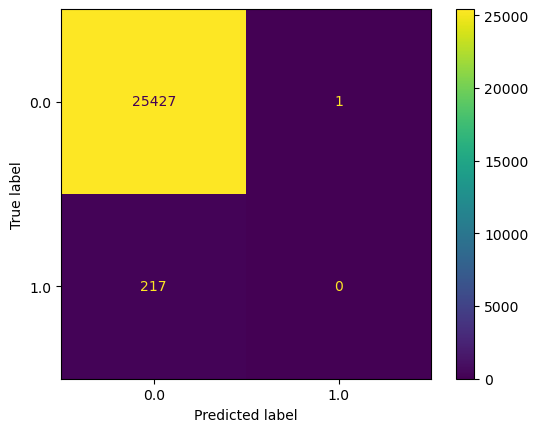

In [106]:
# Import necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Step 1: Initialize the Neural Network model
# 'hidden_layer_sizes' specifies the number of neurons in each hidden layer
nn_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=500, random_state=42)

# Step 2: Train the model
# x_train and y_train are your training data and labels
nn_model.fit(x_train, y_train)

# Step 3: Make predictions
# Predict on the test data
y_pred = nn_model.predict(x_test)

# Step 4: Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(nn_model, x_test, y_test)
plt.show()

KNN

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     25428
         1.0       0.04      0.02      0.03       217

    accuracy                           0.99     25645
   macro avg       0.52      0.51      0.51     25645
weighted avg       0.98      0.99      0.99     25645



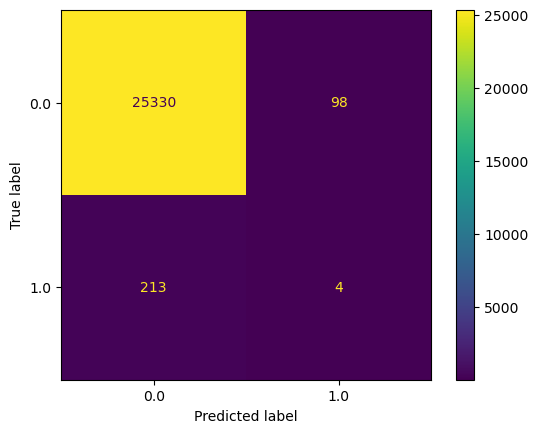

In [107]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Step 1: Initialize the Nearest Neighbors model
# 'n_neighbors' specifies the number of neighbors to consider
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

# Step 2: Train the model
# x_train and y_train are your training data and labels
knn_model.fit(x_train, y_train)

# Step 3: Make predictions
# Predict on the test data
y_pred = knn_model.predict(x_test)

# Step 4: Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(knn_model, x_test, y_test)
plt.show()

In [110]:
BestModels=[best_SVM, best_LR, best_GB, knn_model, nn_model, best_RF, best_DT]
names=['Support Vector Machine', 'Log. Reg', 'Gradient Boosting','KNN', 'Neural Networks', 'Random Forest', 'Decision Tree']

Support Vector Machine


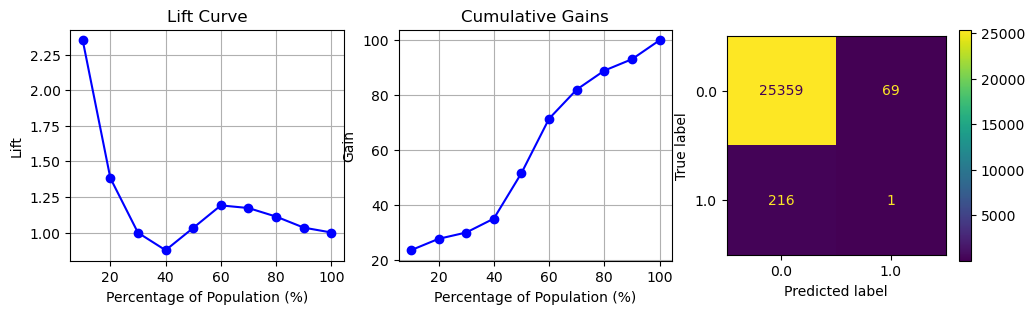

Train AUC: 0.8943761689272389
Test AUC: 0.5600541766433316
Test Accuracy: 98.88867225580034
------------------------------
Log. Reg


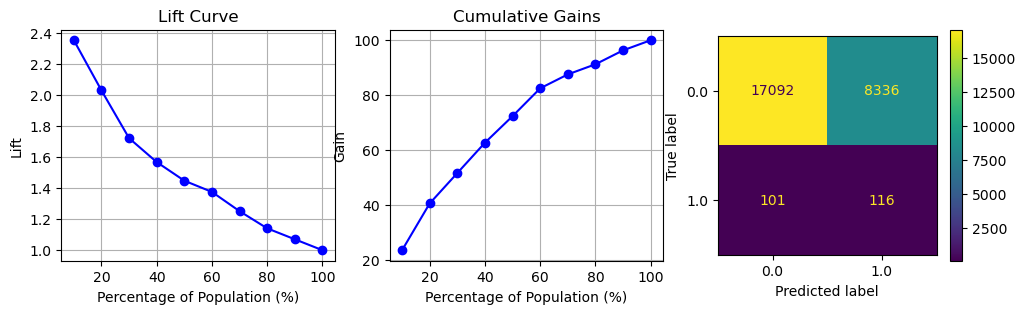

Train AUC: 0.7683716281392383
Test AUC: 0.6632105360830871
Test Accuracy: 67.1007993760967
------------------------------
Gradient Boosting


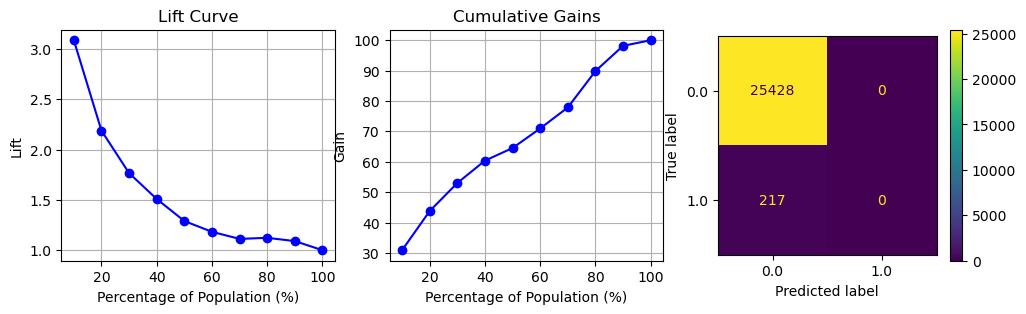

Train AUC: 0.9283453107989492
Test AUC: 0.6498666334654857
Test Accuracy: 99.1538311561708
------------------------------
KNN


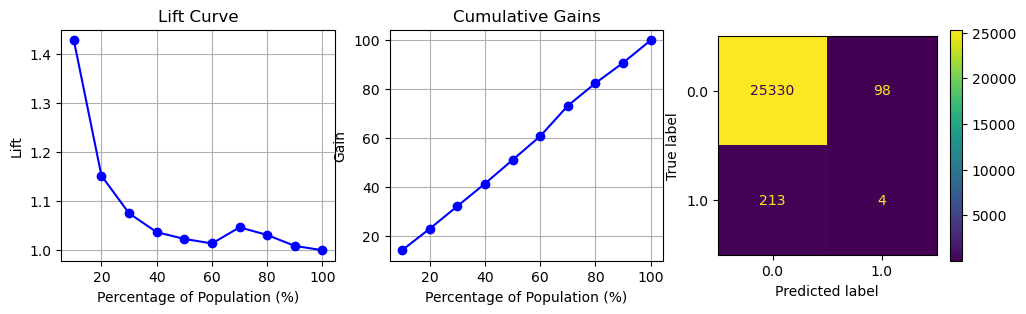

Train AUC: 0.9054704554125015
Test AUC: 0.5270186390560425
Test Accuracy: 98.78728797036459
------------------------------
Neural Networks


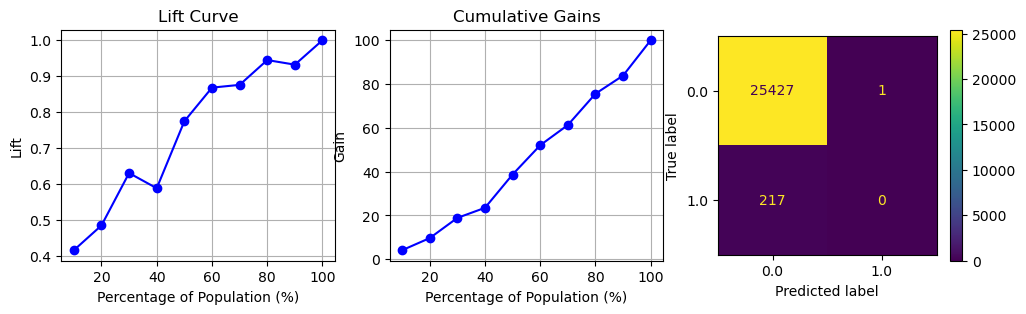

Train AUC: 0.45478342860510346
Test AUC: 0.4166489968241403
Test Accuracy: 99.14993176057712
------------------------------
Random Forest


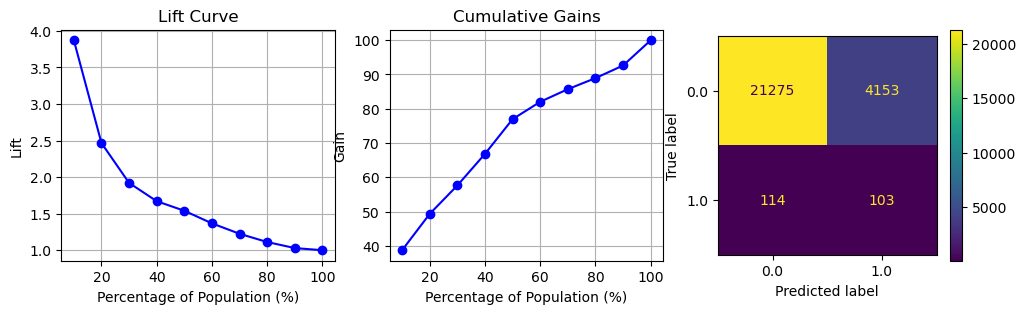

Train AUC: 0.922352990437671
Test AUC: 0.6929313924415844
Test Accuracy: 83.36127900175472
------------------------------
Decision Tree


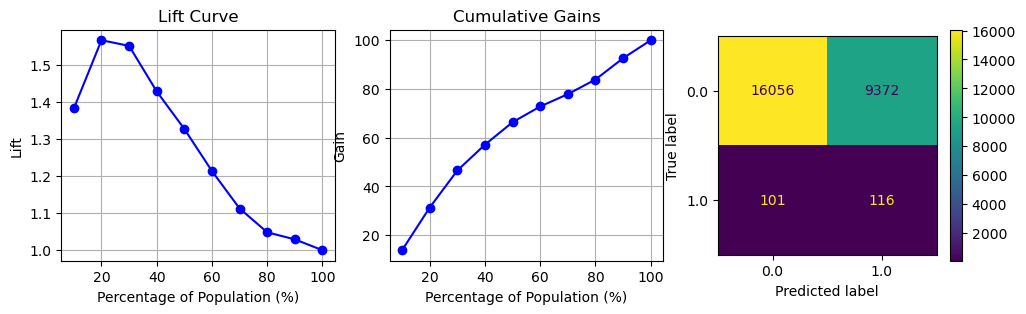

Train AUC: 0.7919991718644834
Test AUC: 0.5832181622058922
Test Accuracy: 63.06102554104114
------------------------------


In [112]:
for model , name in zip(BestModels, names):
  y_train_pred_prob = model.predict_proba(x_train)[:, 1]
  y_test_pred_prob = model.predict_proba(x_test)[:, 1]
  print(name)
  testSet["predicted_churn"] = model.predict(x_test)
  data = pd.DataFrame({'true_labels': y_test, 'pred_prob': y_test_pred_prob})
  sorted_data=data.sort_values(by="pred_prob", ascending=False)
  percentiles = np.arange(10, 101, 10)
  lift = []
  # Calculate cumulative gains for each percentile
  cumulative_gains = []

  # Calculate the total number of positive instances in the dataset
  total_positives = data['true_labels'].sum()

  total_positive_rate = data['true_labels'].mean()
  for percentile in percentiles:
    # Determine the index for the current percentile slice (percentage of total data)
    cutoff = int(np.floor(len(sorted_data) * percentile / 100))
    
    # Get the data for the current slice
    subset = sorted_data.iloc[:cutoff]
    
    # Calculate the proportion of positives in this subset
    actual_positive_rate = subset['true_labels'].mean()
    
    # Calculate the lift (ratio of actual positive rate to random guessing rate)
    lift.append(actual_positive_rate / total_positive_rate)

    # Calculate the number of positives in this slice
    num_positives_in_subset = subset['true_labels'].sum()

    # Calculate cumulative gain (percentage of total positives captured by this slice)
    cumulative_gain = (num_positives_in_subset / total_positives) * 100
    cumulative_gains.append(cumulative_gain)

  fig, ax = plt.subplots(1, 3, figsize=(12, 3))
  ax[0].plot(percentiles, lift, marker='o', linestyle='-', color='b')
  ax[0].set_title('Lift Curve')
  ax[0].set_xlabel('Percentage of Population (%)')
  ax[0].set_ylabel('Lift')
  ax[0].grid(True)

  ax[1].plot(percentiles, cumulative_gains, marker='o', linestyle='-', color='b')
  ax[1].set_title('Cumulative Gains')
  ax[1].set_xlabel('Percentage of Population (%)')
  ax[1].set_ylabel('Gain')
  ax[1].grid(True)


  # Calculate AUC scores
  train_auc = roc_auc_score(y_train, y_train_pred_prob)
  test_auc = roc_auc_score(y_test, y_test_pred_prob)
  #plot a confusion matrix
  cm = confusion_matrix(y_test, testSet['predicted_churn'], labels=model.classes_)
  color = 'white'
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
  disp.plot(ax=ax[2])
  plt.show()

  # Print AUC scores
  print("Train AUC: "+ str(train_auc))
  print("Test AUC: "+ str(test_auc))
  print ("Test Accuracy: " + str(accuracy_score(y_test,testSet['predicted_churn'])*100))
  print("-" * 30)

# Scoring

In [157]:
scoreSet.head()

,donorID,zipcode,sum_amount_Last1Y,sum_amount_Last2Y,sum_amount_Last3Y,sum_amount_Last4Y,sum_amount_Last5Y,sum_amount_Last6Y,sum_amount_Last7Y,sum_amount_Last8Y,...,province_is_Missing,province_is_Namur,province_is_Walloon Brabant,province_is_West Flanders,region_is_Flanders,region_is_Missing,region_is_Wallonia,gender_is_M,language_is_FR,language_is_NL
0,D134242,3580.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,30.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,D126503,4250.0,0.0,0.0,0.0,0.0,0.0,50.0,50.0,50.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,D104392,4820.0,0.0,0.0,0.0,0.0,0.0,50.0,50.0,50.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,D105905,8370.0,0.0,0.0,0.0,25.0,75.0,97.5,102.5,150.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,D120506,8020.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [158]:
x_score.head()

,zipcode,sum_amount_Last1Y,sum_amount_Last2Y,sum_amount_Last3Y,sum_amount_Last4Y,sum_amount_Last5Y,sum_amount_Last6Y,sum_amount_Last7Y,sum_amount_Last8Y,sum_amount_Last9Y,...,province_is_Missing,province_is_Namur,province_is_Walloon Brabant,province_is_West Flanders,region_is_Flanders,region_is_Missing,region_is_Wallonia,gender_is_M,language_is_FR,language_is_NL
0,3580.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,30.0,30.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,4250.0,0.0,0.0,0.0,0.0,0.0,50.0,50.0,50.0,50.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,4820.0,0.0,0.0,0.0,0.0,0.0,50.0,50.0,50.0,50.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,8370.0,0.0,0.0,0.0,25.0,75.0,97.5,102.5,150.0,187.5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,8020.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [159]:
scoreSet["predicted"] = DataFrame(best_RF.predict_proba(x_score))[1]


C:\Users\jchreim\AppData\Local\Temp\ipykernel_17512\2775184071.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  scoreSet["predicted"] = DataFrame(best_RF.predict_proba(x_score))[1]


In [161]:
importfile=scoreSet[['donorID','predicted']]

In [164]:
importfile.to_csv("C:/Users/jchreim/Desktop/Desc. & Pred. Analysis/Group Project/Predictions.csv", index=False)
